In [21]:
#Sección de librerias
from matplotlib import pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
#Sección de carga de datasets
file1 = 'RunningData.csv'
file2= 'Accidentalidad_en_Barranquilla.xls'

In [4]:
#Dataframes
running = pd.read_csv(file1)
accbaq = pd.read_excel(file2)

In [5]:
#Sacamos los datos necesarios para el análisis
distancia = running['Distance (km)']
accdate = accbaq[['AÑO_ACCIDENTE','MES_ACCIDENTE','DIA_ACCIDENTE','CANTIDAD_ACCIDENTES']]

In [33]:
distancia
min_d = round(distancia.min(),1)
max_d = round(distancia.max(),1)

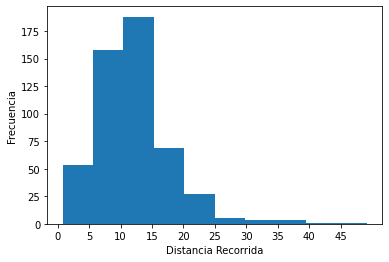

In [36]:
c = int(np.ceil(1+np.log2(508)))#Regla de Sturges
plt.hist(distancia,bins=c)#bins numero de parametros o rangos a subdividir,se pueden especificar
plt.xlabel("Distancia Recorrida")
plt.ylabel("Frecuencia")
plt.xticks(np.arange(0,50,5))
plt.show()

In [35]:
distancia.describe()

count    508.000000
mean      12.041732
std        6.064125
min        0.760000
25%        9.495000
50%       11.460000
75%       13.642500
max       49.180000
Name: Distance (km), dtype: float64